<a href="https://colab.research.google.com/github/yogithaghegde/apps/blob/main/Walmart_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import datetime as dt
import math
import os
from math import pi


In [ ]:
data = pd.read_csv('/content/Walmart.csv')

<Axes: xlabel='Store', ylabel='Weekly_Sales'>

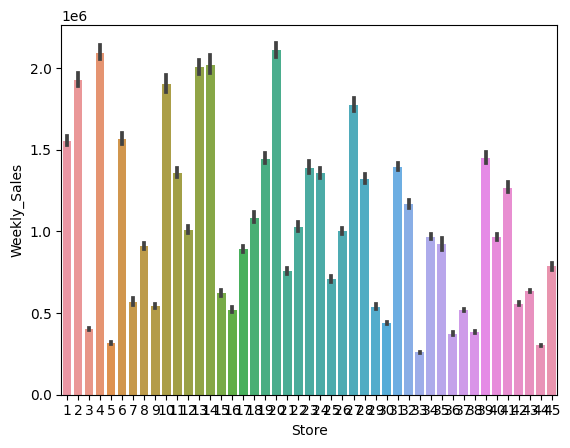

In [ ]:
sns.barplot(data =data.sort_values('Weekly_Sales',ascending=False).head(5),y=data['Weekly_Sales'],x=data['Store'])

In [ ]:
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,month,year,day,WeekOfYear
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,May,2010,Sunday,17
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,December,2010,Thursday,48
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,February,2010,Friday,7
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,February,2010,Friday,8
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,May,2010,Monday,18


Weekly_Sales is the dependent variable and what we need to predict

In [ ]:
data.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [ ]:
data['Date']=pd.to_datetime(data['Date'])
data['month']=data['Date'].dt.month_name()
data['year']=data['Date'].dt.year
data['day'] = data['Date'].dt.day_name()
data['WeekOfYear'] = data.Date.dt.isocalendar().week

<ipython-input-4-1075761b9b83>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['Date']=pd.to_datetime(data['Date'])


<Axes: xlabel='month', ylabel='count'>

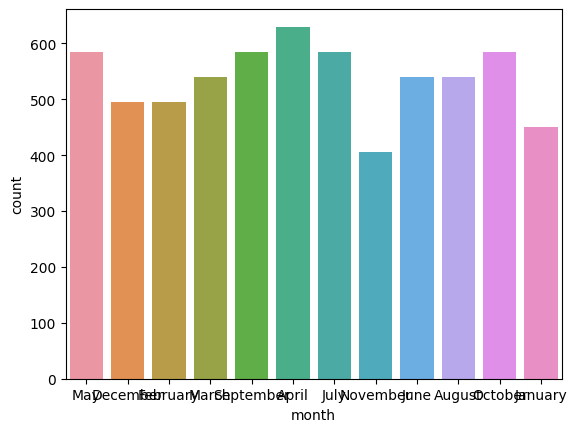

In [ ]:
sns.countplot(x=data['month'])

<Axes: xlabel='day', ylabel='count'>

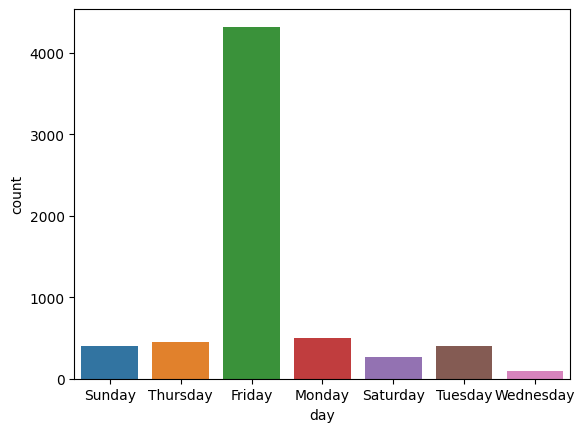

In [ ]:
sns.countplot(x=data['day'])

this wont be correct as the data is recorded once every week and friday is usually when a week ends

<Axes: xlabel='month', ylabel='Weekly_Sales'>

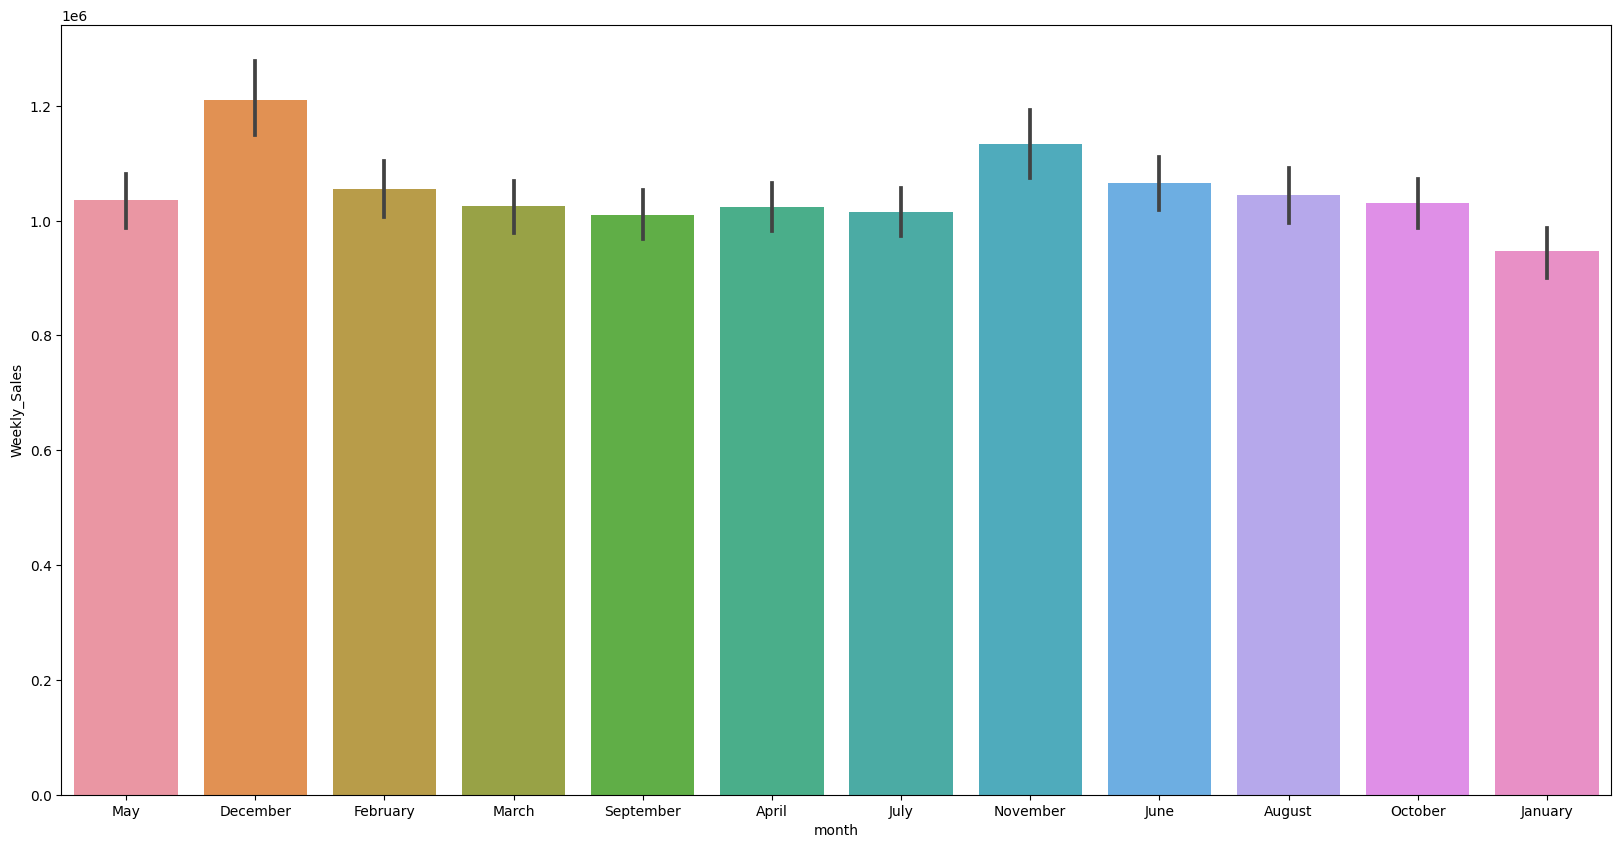

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(data=data,x=data['month'],y=data['Weekly_Sales'])

<ipython-input-25-df6ff431242e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),linewidths=0.5)


<Axes: >

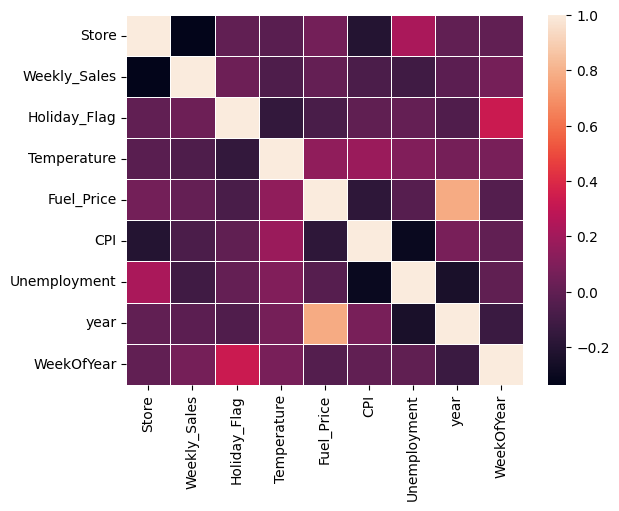

In [ ]:
sns.heatmap(data.corr(),linewidths=0.5)

* CPI and Unemployment have negetive correlation


In [ ]:
data['Store'].nunique()

45

There are 45 stores

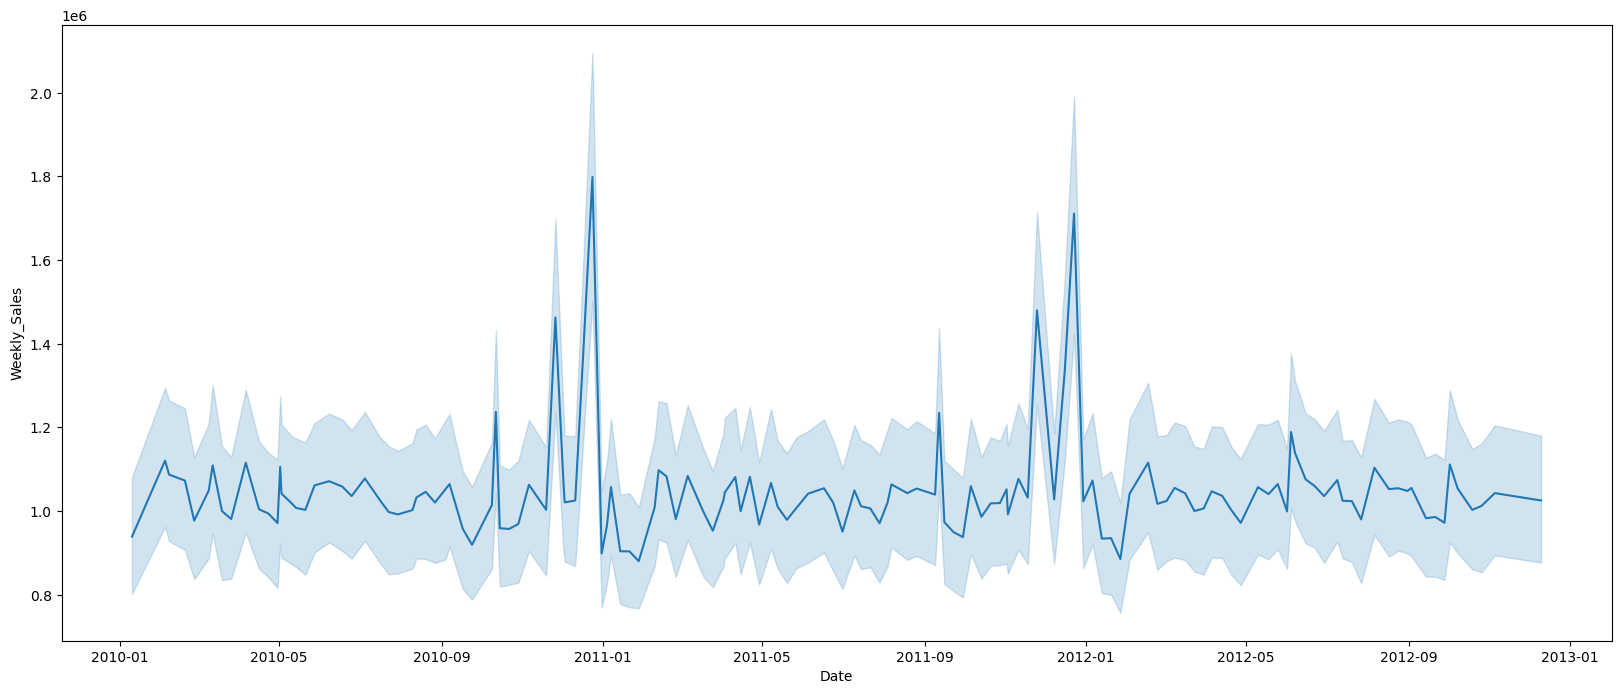

In [ ]:
# Sales trend
plt.figure(figsize=(20,8))
sns.lineplot(data=data,y=data['Weekly_Sales'],x=data['Date'])
plt.show()

TypeError: ignored

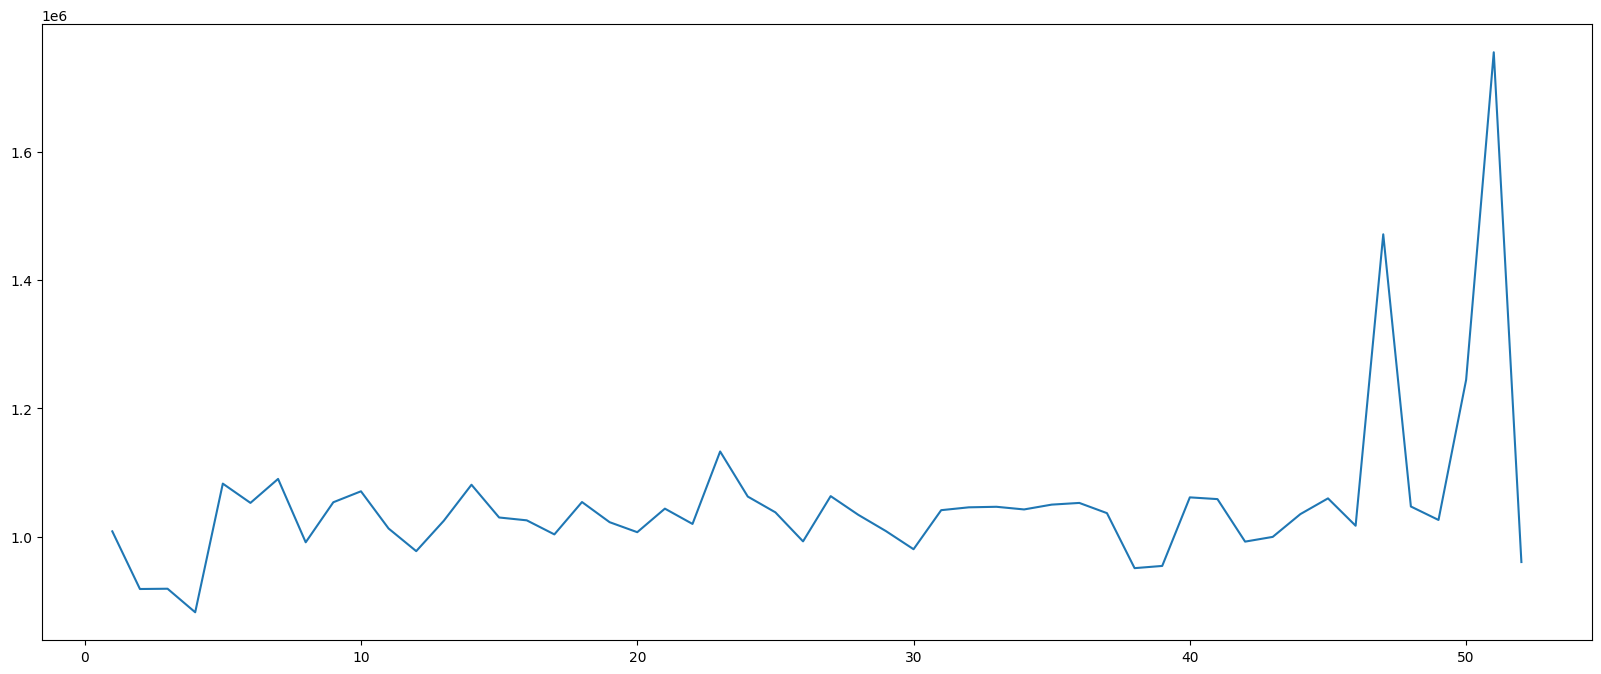

In [ ]:
plt.figure(figsize=(20,8))
sns.lineplot(data=data,y=data['Weekly_Sales'],x=data['WeekOfYear'])
plt.show()

We can see a pattern. Sales reach its peak during the end of the year
* small spikes are also seen inbetween

#store wise sales

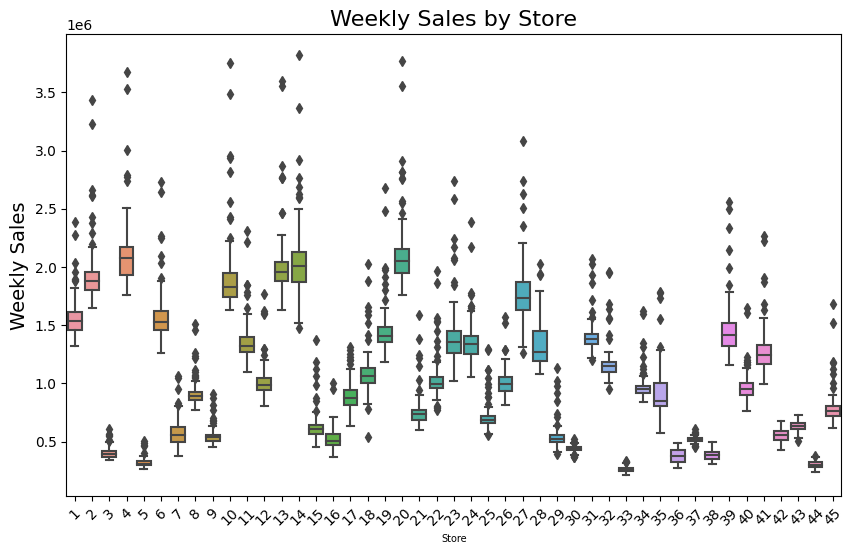

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Store', y='Weekly_Sales', data=data)
plt.xlabel('Store', fontsize=7)
plt.ylabel('Weekly Sales', fontsize=14)
plt.title('Weekly Sales by Store', fontsize=16)
plt.xticks(rotation=45) # Rotate x-axis labels by 45 degrees
plt.show()

(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.]),
 [Text(-10.0, 0, '−10'),
  Text(0.0, 0, '0'),
  Text(10.0, 0, '10'),
  Text(20.0, 0, '20'),
  Text(30.0, 0, '30'),
  Text(40.0, 0, '40'),
  Text(50.0, 0, '50')])

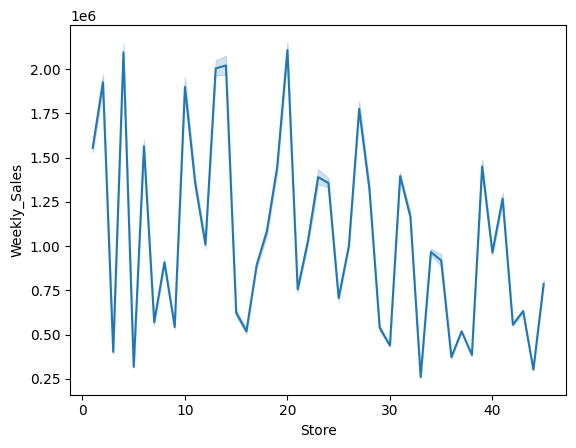

In [ ]:
sns.lineplot(data=data,x=data['Store'],y=data['Weekly_Sales'].value_counts(5))

<Axes: xlabel='Holiday_Flag', ylabel='Weekly_Sales'>

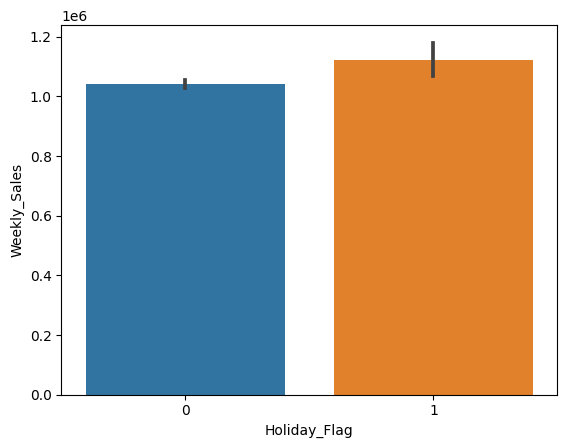

In [ ]:
sns.barplot(data=data,x=data['Holiday_Flag'],y=data['Weekly_Sales'])

In [ ]:
holiday_sales = data[data['Holiday_Flag']==1]['Weekly_Sales']
non_holiday_sales = data[data['Holiday_Flag']==0]['Weekly_Sales']
mean_holiday_sales = np.mean(holiday_sales)
mean_non_holiday_sales = np.mean(non_holiday_sales)

In [ ]:
print(mean_holiday_sales)
print(mean_non_holiday_sales)

1122887.8923555557
1041256.3802088555


<Axes: xlabel='Holiday_Flag', ylabel='Weekly_Sales'>

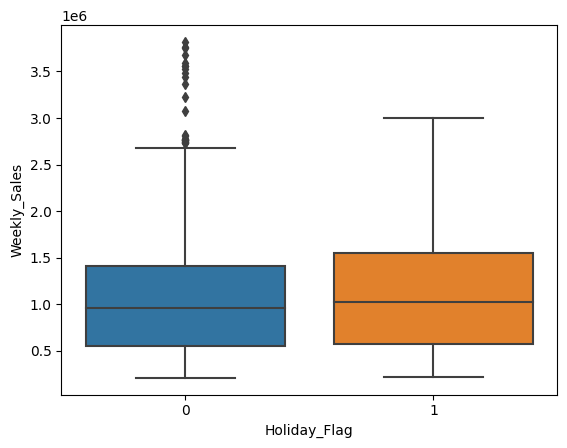

In [ ]:
sns.boxplot(x='Holiday_Flag',y='Weekly_Sales',data=data)

The sales are definetely higher during the holidays

<Axes: xlabel='Temperature', ylabel='Weekly_Sales'>

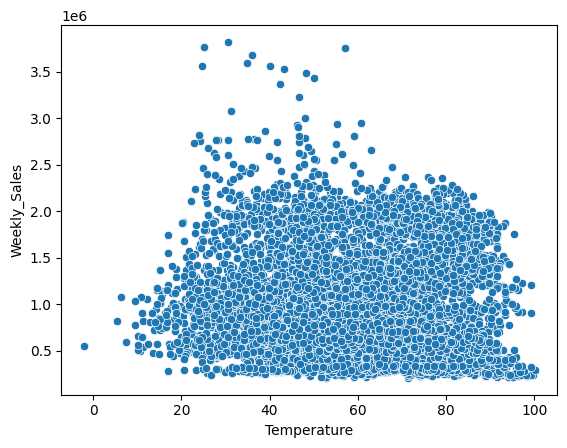

In [ ]:
sns.scatterplot(x='Temperature',y='Weekly_Sales',data=data)

In [ ]:
np.corrcoef(data['Temperature'],data['Weekly_Sales'])

array([[ 1.        , -0.06381001],
       [-0.06381001,  1.        ]])

temparature and sales have a slightly negetive correlation
as temperature increases sales slightly decrease

<Axes: xlabel='Fuel_Price', ylabel='Weekly_Sales'>

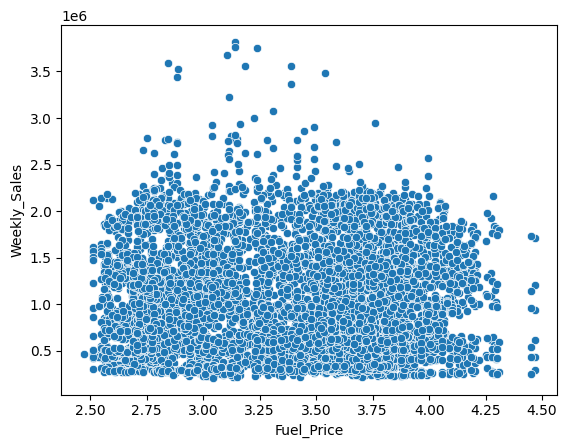

In [ ]:
sns.scatterplot(x='Fuel_Price',y='Weekly_Sales',data=data)

There is not much effect of fuel price on the sales

<ipython-input-31-93effe46bfab>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['CPI'])


<Axes: xlabel='CPI', ylabel='Density'>

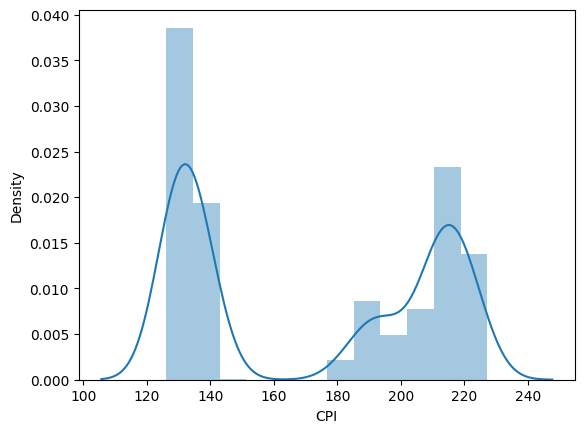

In [ ]:
sns.distplot(data['CPI'])

<Axes: xlabel='Date', ylabel='CPI'>

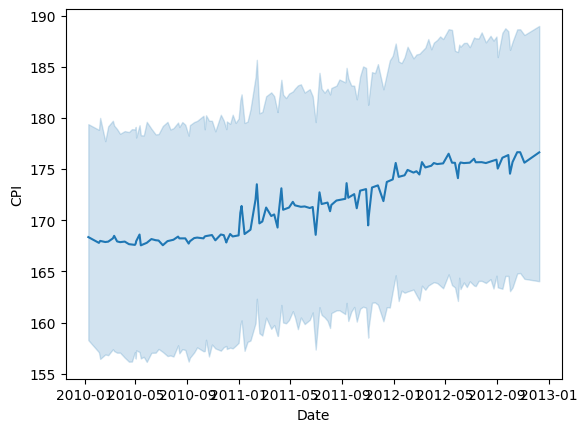

In [ ]:
sns.lineplot(data=data,x='Date',y='CPI')

CPI is an indicator of inflation, the plot shows steady increase in CPI which means prices have also gone high steadily

<Axes: xlabel='CPIcat', ylabel='Weekly_Sales'>

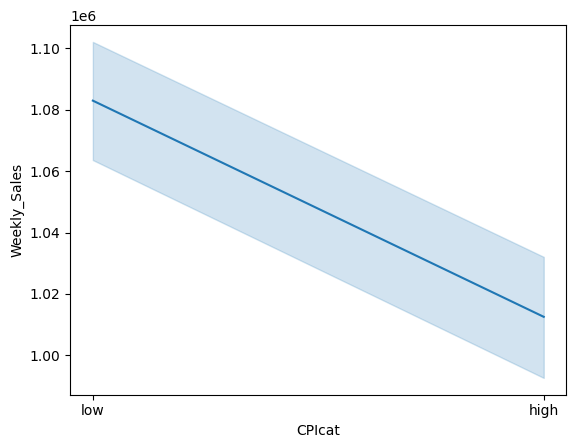

In [ ]:
sns.lineplot(data=data,x='CPIcat',y='Weekly_Sales')

In [ ]:
bins = [0,180,230]
labels = ['low','high']
data['CPIcat'] = pd.cut(data['CPI'],bins,labels= labels)

In [ ]:
cpilowsales = data[data['CPIcat']=='low']['Weekly_Sales']
cpihighsales = data[data['CPIcat']=='high']['Weekly_Sales']
meancpilow = np.mean(cpilowsales)
meancpihigh = np.mean(cpihighsales)

In [ ]:
print(meancpilow)
print(meancpihigh) 


1082953.3652447553
1012541.1067345699


sales is slightly ligher when cpi is low

<Axes: xlabel='Unemployment', ylabel='Weekly_Sales'>

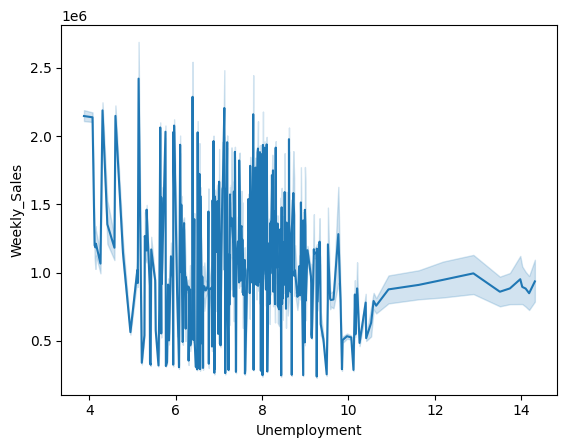

In [ ]:
sns.lineplot(data=data,x='Unemployment',y='Weekly_Sales')

In [ ]:
np.corrcoef(data['Unemployment'],data['Weekly_Sales'])

array([[ 1.        , -0.10617609],
       [-0.10617609,  1.        ]])

As unemployment increases, sales slightly decreases

#Conclusion
Factors effecting sales are:
* Holidays
* Temperature
* CPI
* Unemployment.

 While building a model, these must be given higher weight


#Building a model to predict sales

In [ ]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

In [ ]:
#Linear regression
datacop = data.copy()
data= data.drop(columns=['Date','CPIcat'])



In [ ]:
data.drop(columns=['day_of_week_sin','day_of_week_cos'],inplace=True)

In [ ]:
data.describe()

,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,month,year,day,WeekOfYear,storeenc
count,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.0,6.435000e+03
mean,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151,5.496503,2010.965035,1.027972,26.0,1.046965e+06
std,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885,3.522181,0.797019,1.717767,14.511794,5.405605e+05
min,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000,0.000000,2010.000000,0.000000,1.0,2.598617e+05
25%,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000,2.000000,2010.000000,0.000000,14.0,5.564039e+05
50%,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000,6.000000,2011.000000,0.000000,26.0,9.667816e+05
75%,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000,8.000000,2012.000000,2.000000,38.0,1.395901e+06
max,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000,11.000000,2012.000000,6.000000,52.0,2.107677e+06


encoding days of week

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['month'] = le.fit_transform(data['month'])
data['day'] = le.fit_transform(data['day'])

In [ ]:
#NOT GONNA USE THIS
data['day_of_week_sin'] = np.sin(data['day'] * (2 * np.pi / 7))
data['day_of_week_cos'] = np.cos(data['day'] * (2 * np.pi / 7))


In [ ]:
#target encoding: works when there is correlation between x and y
store_mean_sales = data.groupby('Store')['Weekly_Sales'].mean()
data['storeenc'] = data['Store'].map(store_mean_sales)

In [ ]:
data.drop(columns=['Store'],inplace=True)

In [ ]:
X = data.drop(columns=['Weekly_Sales','day','Date'])
Y = data[['Weekly_Sales']]

In [ ]:
X

,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,month,year,WeekOfYear,storeenc
0,0,42.31,2.572,211.096358,8.106,8,2010,17,1.555264e+06
1,1,38.51,2.548,211.242170,8.106,2,2010,48,1.555264e+06
2,0,39.93,2.514,211.289143,8.106,3,2010,7,1.555264e+06
3,0,46.63,2.561,211.319643,8.106,3,2010,8,1.555264e+06
4,0,46.50,2.625,211.350143,8.106,8,2010,18,1.555264e+06
...,...,...,...,...,...,...,...,...,...
6430,0,64.88,3.997,192.013558,8.684,11,2012,39,7.859814e+05
6431,0,64.89,3.985,192.170412,8.667,8,2012,19,7.859814e+05
6432,0,54.47,4.000,192.327265,8.667,2,2012,50,7.859814e+05
6433,0,56.47,3.969,192.330854,8.667,10,2012,42,7.859814e+05


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state= 42)

In [ ]:
#Scaling the data
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
rob_scaler = RobustScaler()
rob_scaler.fit(x_train)
x_train = rob_scaler.transform(x_train)
x_test = rob_scaler.transform(x_test)


Function to apply regression models

In [ ]:
def pred_model(model,X_train,Y_train,X_test,Y_test):
    c = model()
    c.fit(X_train,Y_train)
    y_pred = c.predict(X_test)
    print(model)
    print(f'MSE: {mean_squared_error(Y_test,y_pred)}')
    print(f'MAE: {mean_absolute_error(Y_test,y_pred)}')
    print(f'R2 : {r2_score(Y_test,y_pred)}')

Applying various regression models

In [ ]:
pred_model(LinearRegression,x_train,y_train,x_test,y_test)

<class 'sklearn.linear_model._base.LinearRegression'>
MSE: 24464979311.52226
MAE: 97544.0857651698
R2 : 0.9240582565100787


In [ ]:
# USING Lasso Regression MODEL
pred_model(Lasso,x_train,y_train,x_test,y_test)

<class 'sklearn.linear_model._coordinate_descent.Lasso'>
MSE: 24464835250.09532
MAE: 97542.65923598413
R2 : 0.9240587036911612


In [ ]:
# USING Ridge Regression MODEL
pred_model(Ridge,x_train,y_train,x_test,y_test)

<class 'sklearn.linear_model._ridge.Ridge'>
MSE: 24461130412.460575
MAE: 97503.9821104744
R2 : 0.9240702038778462


In [ ]:
# USING ElasticNet MODEL
pred_model(ElasticNet,x_train,y_train,x_test,y_test)

<class 'sklearn.linear_model._coordinate_descent.ElasticNet'>
MSE: 112027775971.74864
MAE: 269417.1446996106
R2 : 0.6522545750698387


In [ ]:
from sklearn.tree import DecisionTreeRegressor
pred_model(DecisionTreeRegressor,x_train,y_train,x_test,y_test)

<class 'sklearn.tree._classes.DecisionTreeRegressor'>
MSE: 13196937810.804358
MAE: 72909.42428127427
R2 : 0.9590353846893079


In [ ]:
# USING Random Forest Regressor MODEL
pred_model(RandomForestRegressor,x_train,y_train,x_test,y_test)

<ipython-input-15-3f2f9a690185>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  c.fit(X_train,Y_train)


<class 'sklearn.ensemble._forest.RandomForestRegressor'>
MSE: 8109768244.647752
MAE: 57331.80716837604
R2 : 0.9748264679910155


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=120)
gbrt.fit(x_train, y_train)
errors = [mean_squared_error(y_test, y_pred) for y_pred in gbrt.staged_predict(x_test)]
bst_n_estimators = np.argmin(errors)
gbrt_best = GradientBoostingRegressor(max_depth=2,n_estimators=bst_n_estimators)
gbrt_best.fit(x_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(max_depth=2, n_estimators=119)

In [ ]:
from sklearn.ensemble import (AdaBoostRegressor, 
                              RandomForestRegressor,
                              VotingRegressor, 
                              GradientBoostingRegressor)
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from mlxtend.regressor import StackingCVRegressor
from xgboost import XGBRegressor
from lightgbm import (LGBMRegressor,
                      early_stopping)
from sklearn.svm import SVR

from sklearn.base import clone ## sklearn base models for stacked ensemble model
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold

k_fold = KFold(n_splits = 10, random_state = 11, shuffle = True)

In [ ]:
xgb = XGBRegressor(n_estimators = 1000, random_state = 1)
lgbm = LGBMRegressor(n_estimators = 1000, random_state = 1)
gbr = GradientBoostingRegressor(n_estimators = 1000, random_state = 11)
rf = RandomForestRegressor(n_estimators = 1000, random_state = 1)
svr = SVR(C = 20)
lasso = LassoCV(alphas = [1e-10, 1e-8, 1e-7, 1e-5, 1e-2, 9e-4,
                                                        5e-4, 3e-4, 1e-4, 1e-3, 1e-2, 0.1,
                                                        0.3, 0.6, 1, 3, 5, 7, 14, 18, 25, 30,
                                                        45, 50, 70, 90], n_jobs = -1, cv = k_fold)

stacked = StackingCVRegressor(regressors = (xgb, lgbm, svr, lasso, gbr, rf),
                              meta_regressor = xgb, use_features_in_secondary = True)

In [ ]:
stacked_model = stacked.fit(np.array(x_train), np.array(y_train))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

In [ ]:
y_predstack = stacked_model.predict(x_test)


In [ ]:
stacked_score_train = mean_squared_error(y_test, stacked_model.predict(x_test))
print("mean_squared_error score of stacked models on full train data:", stacked_score_train)
#RMSLE score of the stacked model on full TEST data

stacked_score_test = mean_absolute_error(y_test, stacked_model.predict(x_test))
print("mean_absolute_error score of stacked models on full test data:", stacked_score_test)

mean_squared_error score of stacked models on full train data: 4744570874.031173
mean_absolute_error score of stacked models on full test data: 44585.37689296815


In [ ]:
r2_score(y_predstack,y_test)

0.9847730658882771

In [ ]:
mean_squared_error(y_test, stacked_model.predict(x_test))

4859530907.651968

In [ ]:
import pickle

with open("stacked_model_walmart_98.pkl",'wb') as file:
  pickle.dump(stacked_model,file)

In [ ]:
import joblib
model = stacked_model 
joblib.dump(model,'stacked_model_walmart_98.joblib')

['stacked_model_walmart_98.joblib']